In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [30]:
df=pd.read_csv("Salary Data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [31]:
df.dropna(inplace=True)
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [32]:
df['Age'].astype(int)
df['Years of Experience'].astype(int)
df['Salary'].astype(int)

0       90000
1       65000
2      150000
3       60000
4      200000
        ...  
370     85000
371    170000
372     40000
373     90000
374    150000
Name: Salary, Length: 373, dtype: int32

In [33]:
df.shape

(373, 6)

In [34]:
df['Job Title'].value_counts()

Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: Job Title, Length: 174, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x234f6857610>,
 'caps': [<matplotlib.lines.Line2D at 0x234f6842290>,
 'boxes': [<matplotlib.lines.Line2D at 0x234f6836dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x234f6843010>],
 'fliers': [<matplotlib.lines.Line2D at 0x234f5872750>],
 'means': []}

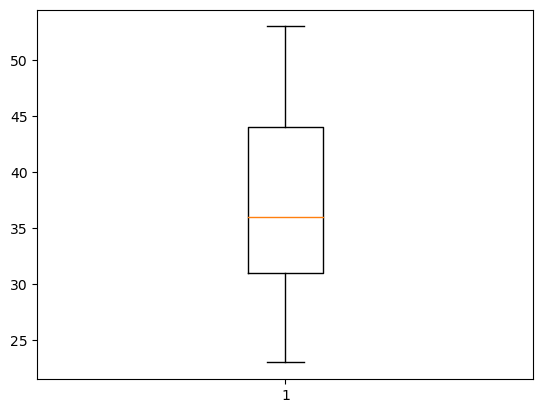

In [35]:
import matplotlib.pyplot as plt
plt.boxplot(df['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x234f68ebe90>,
 'caps': [<matplotlib.lines.Line2D at 0x234f68f4f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x234f68eb610>],
 'medians': [<matplotlib.lines.Line2D at 0x234f68f5ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x234f68f6650>],
 'means': []}

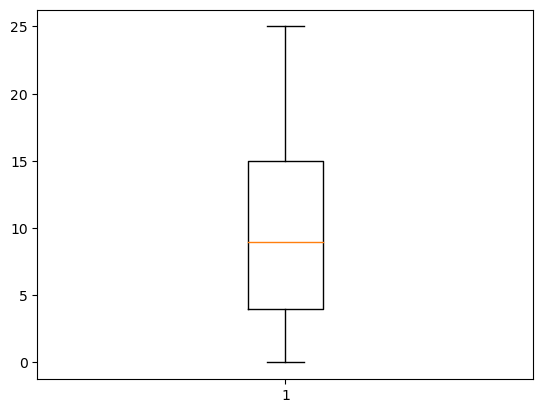

In [36]:
plt.boxplot(df['Years of Experience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x234f6950a10>,
 'caps': [<matplotlib.lines.Line2D at 0x234f6951d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x234f69500d0>],
 'medians': [<matplotlib.lines.Line2D at 0x234f6952cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x234f69534d0>],
 'means': []}

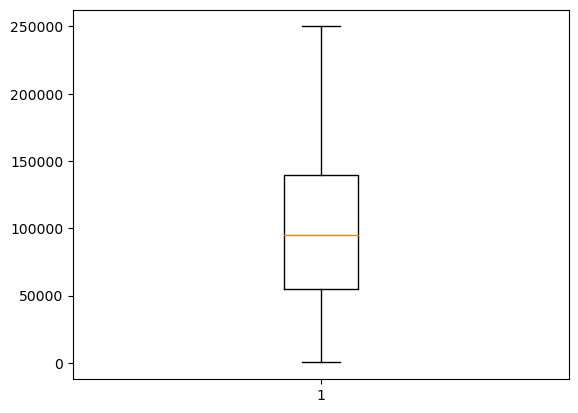

In [37]:
plt.boxplot(df['Salary'])

In [38]:
from sklearn.preprocessing import LabelEncoder

# Create the encoders
job_encoder = LabelEncoder()
edu_encoder = LabelEncoder()
gender_encoder = LabelEncoder()

# Fit & transform the columns (fit happens here)
df['Job Title'] = job_encoder.fit_transform(df['Job Title'])
df['Education Level'] = edu_encoder.fit_transform(df['Education Level'])
df['Gender'] = gender_encoder.fit_transform(df['Gender'])

# Now .classes_ will work because encoders are already fitted
print(job_encoder.classes_)
print(edu_encoder.classes_)
print(gender_encoder.classes_)

# Save the encoders for use in Streamlit app or elsewhere
joblib.dump(job_encoder, 'encoders/job_encoder.pkl')
joblib.dump(edu_encoder, 'encoders/edu_encoder.pkl')
joblib.dump(gender_encoder, 'encoders/gender_encoder.pkl')

['Account Manager' 'Accountant' 'Administrative Assistant'
 'Business Analyst' 'Business Development Manager'
 'Business Intelligence Analyst' 'CEO' 'Chief Data Officer'
 'Chief Technology Officer' 'Content Marketing Manager' 'Copywriter'
 'Creative Director' 'Customer Service Manager' 'Customer Service Rep'
 'Customer Service Representative' 'Customer Success Manager'
 'Customer Success Rep' 'Data Analyst' 'Data Entry Clerk' 'Data Scientist'
 'Digital Content Producer' 'Digital Marketing Manager' 'Director'
 'Director of Business Development' 'Director of Engineering'
 'Director of Finance' 'Director of HR' 'Director of Human Capital'
 'Director of Human Resources' 'Director of Marketing'
 'Director of Operations' 'Director of Product Management'
 'Director of Sales' 'Director of Sales and Marketing' 'Event Coordinator'
 'Financial Advisor' 'Financial Analyst' 'Financial Manager'
 'Graphic Designer' 'HR Generalist' 'HR Manager' 'Help Desk Analyst'
 'Human Resources Director' 'IT Manag

['encoders/gender_encoder.pkl']

In [39]:
print(type(job_encoder))
print(hasattr(job_encoder, 'classes_'))
print(df['Job Title'].head())

<class 'sklearn.preprocessing._label.LabelEncoder'>
True
0    159
1     17
2    130
3    101
4     22
Name: Job Title, dtype: int32


In [40]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [43]:
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}


In [44]:

best_model = None
best_score = float("inf")
best_r2 = float("-inf")
best_name = ""
results = []
for name, model in models.items():
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    mae= mean_absolute_error(y_test, preds)
    r2= r2_score(y_test, preds)
    rmse= np.sqrt(mse);
    print(f"\n{name} Results:")
    print(f"{name} RMSE: {rmse:.2f}")
    print(f"{name} MAE: {mae:.2f}")
    print(f"{name} MSE: {mse:.2f}")
    print(f"{name} R2 Score: {r2:.2f}")
    
    if mse < best_score:
        best_score = mse
        best_model = pipe
        best_name = name
        best_r2 = r2
    results.append({
        "Model": name,
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse,
        "R2 Score": r2,
        "Predictions": preds
    })


print(f"\n🏆 Best Model: {best_name} with MSE: {best_score:.2f} and R2 score: {best_r2:.2f}")
joblib.dump(best_model, "salary_model.pkl")


LinearRegression Results:
LinearRegression RMSE: 16349.28
LinearRegression MAE: 12358.46
LinearRegression MSE: 267299022.86
LinearRegression R2 Score: 0.89

RandomForest Results:
RandomForest RMSE: 17224.21
RandomForest MAE: 12248.78
RandomForest MSE: 296673451.41
RandomForest R2 Score: 0.88

XGBoost Results:
XGBoost RMSE: 19034.01
XGBoost MAE: 12495.68
XGBoost MSE: 362293509.39
XGBoost R2 Score: 0.85

GradientBoosting Results:
GradientBoosting RMSE: 17044.86
GradientBoosting MAE: 11956.22
GradientBoosting MSE: 290527221.36
GradientBoosting R2 Score: 0.88

KNN Results:
KNN RMSE: 17558.66
KNN MAE: 12413.33
KNN MSE: 308306666.67
KNN R2 Score: 0.87

🏆 Best Model: LinearRegression with MSE: 267299022.86 and R2 score: 0.89


['salary_model.pkl']

In [ ]:
results_df = pd.DataFrame(results)
results_df.sort_values("R2 Score", ascending=False, inplace=True)
results_df
results_df.to_csv("results_df.csv", index=False)

,Model,MSE,MAE,RMSE,R2 Score,Predictions
0,LinearRegression,2.672990e+08,12358.463999,16349.282029,0.888513,"[171912.18158604018, 103906.32190127074, 14124..."
3,GradientBoosting,2.905272e+08,11956.223909,17044.859089,0.878825,"[175396.43379843808, 99021.15866152216, 160233..."
1,RandomForest,2.966735e+08,12248.783860,17224.211199,0.876261,"[175637.91666666663, 95799.88095238095, 164381..."
4,KNN,3.083067e+08,12413.333333,17558.663579,0.871409,"[179000.0, 99000.0, 166000.0, 79000.0, 137000...."
2,XGBoost,3.622935e+08,12495.684219,19034.009283,0.848892,"[176104.62, 97212.94, 164306.2, 83656.5, 12691..."


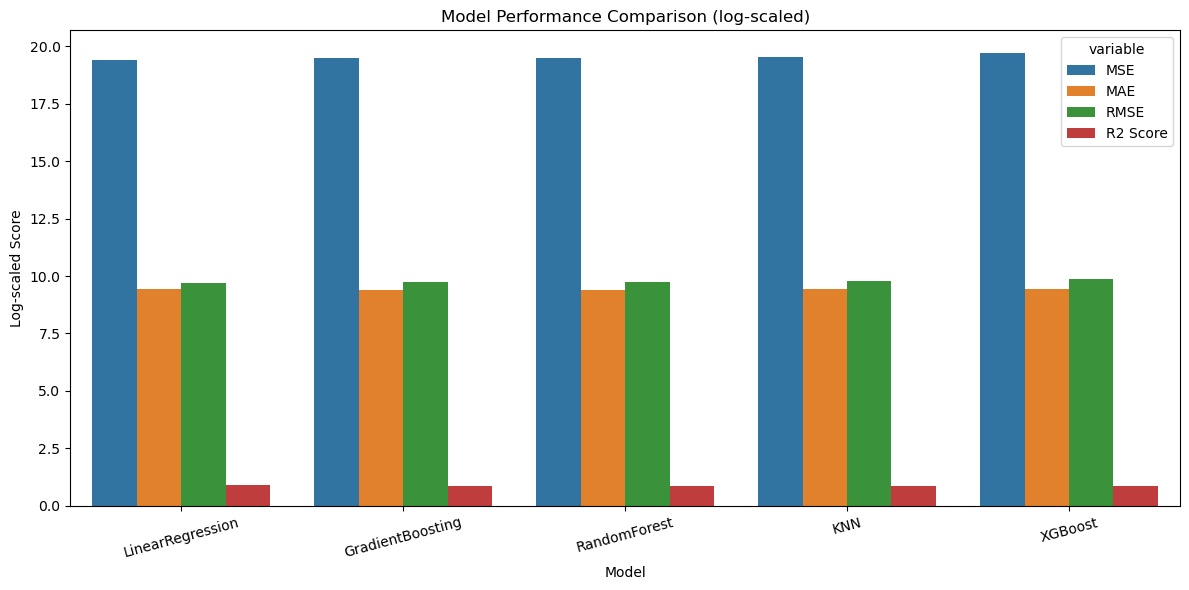

In [46]:
import numpy as np

# Apply log transform to all except R2 Score (since it's already between 0 and 1)
np.float=float
results_df_log = results_df.copy()
results_df_log[['MSE', 'MAE', 'RMSE']] = results_df_log[['MSE', 'MAE', 'RMSE']].apply(np.log1p)

# Now plot
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df_log.melt(id_vars="Model", value_vars=["MSE", "MAE", "RMSE", "R2 Score"]),
            x="Model", y="value", hue="variable")

plt.title("Model Performance Comparison (log-scaled)")
plt.ylabel("Log-scaled Score")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()



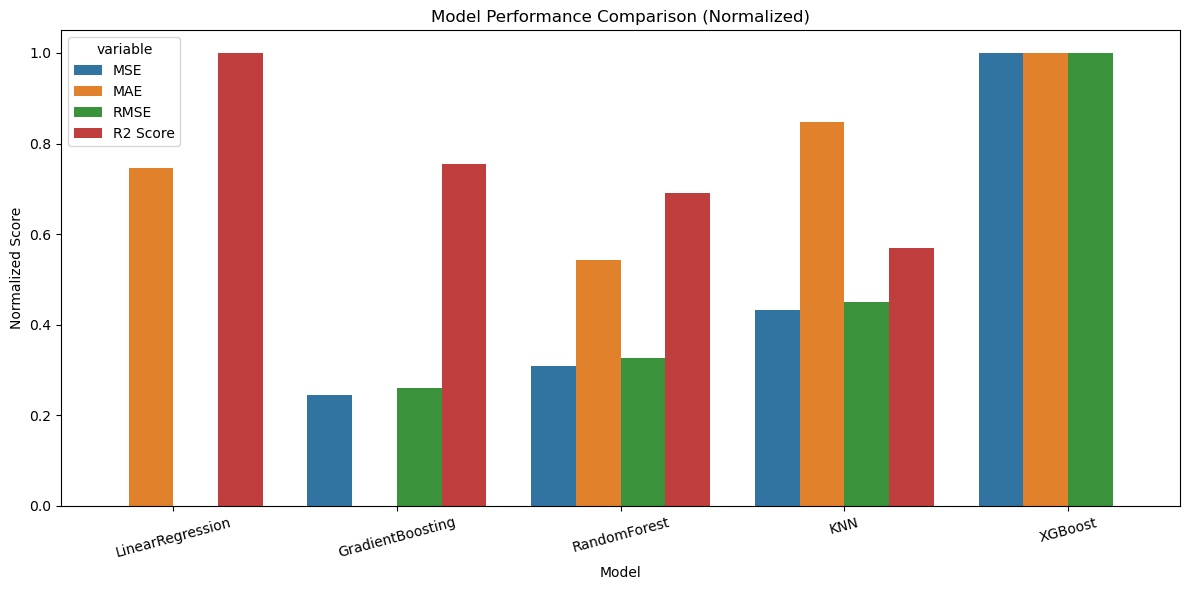

In [47]:
from sklearn.preprocessing import MinMaxScaler

# Normalize all metrics
scaler = MinMaxScaler()
normalized_df = results_df.copy()
normalized_df[['MSE', 'MAE', 'RMSE', 'R2 Score']] = scaler.fit_transform(
    results_df[['MSE', 'MAE', 'RMSE', 'R2 Score']])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=normalized_df.melt(id_vars="Model", value_vars=["MSE", "MAE", "RMSE", "R2 Score"]),
            x="Model", y="value", hue="variable")

plt.title("Model Performance Comparison (Normalized)")
plt.ylabel("Normalized Score")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

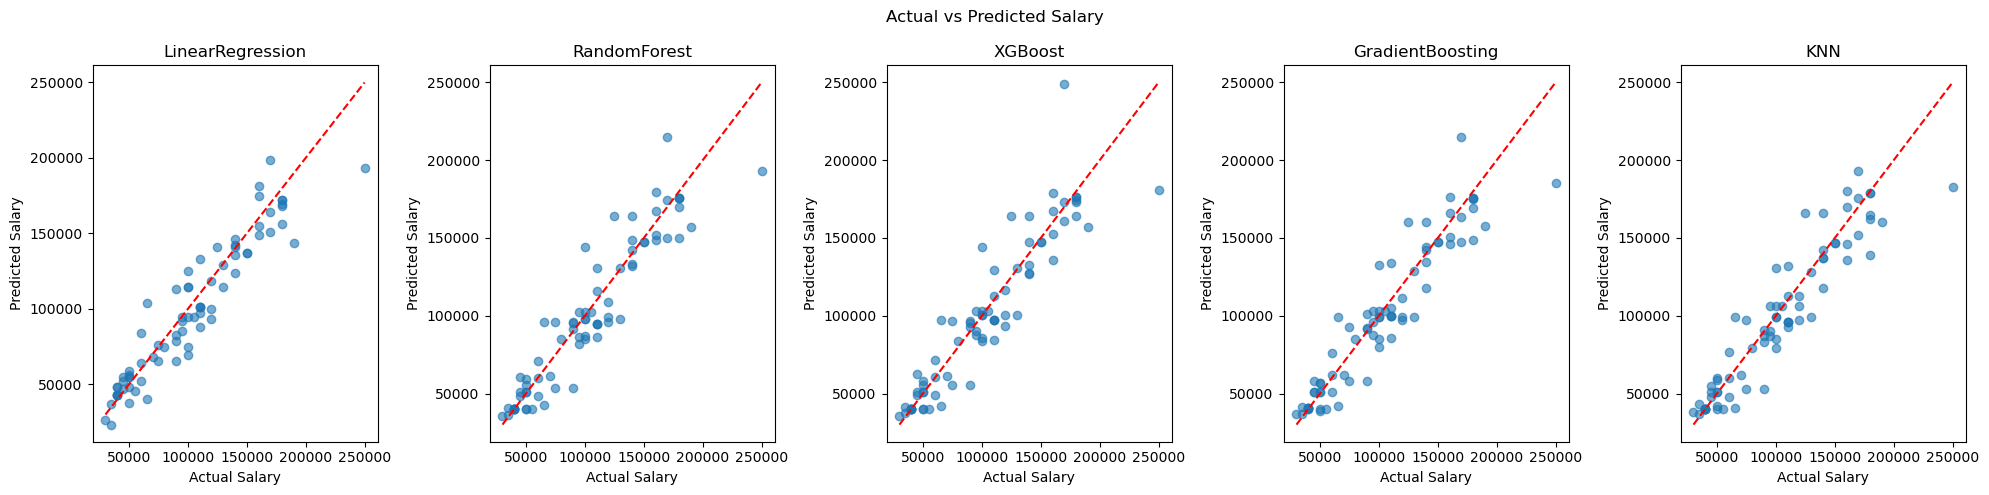

In [48]:
fig, axs = plt.subplots(1, len(results), figsize=(20, 5))

for idx, res in enumerate(results):
    axs[idx].scatter(y_test, res["Predictions"], alpha=0.6)
    axs[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
    axs[idx].set_title(res["Model"])
    axs[idx].set_xlabel("Actual Salary")
    axs[idx].set_ylabel("Predicted Salary")

plt.suptitle("Actual vs Predicted Salary")
plt.tight_layout()
plt.show()
